<a href="https://colab.research.google.com/github/heispv/youtube/blob/master/simple_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [5]:
# Create a simple dataset
x = np.linspace(-30, 30, 50)

slope = 2
intercept = 3
noise = 0.8

y = x * slope + intercept + np.arange(len(x)) * np.random.rand(len(x)) * noise

🤔 Be in nokte deghat konin ke dalile inke ma oomadim az `np.arange(len(x))` estefade kardim va nayumadim az `x` estefade konim, in bood ke agar az `x` estefade konim harchi be data haye nazdike 0 nazdik mishim noise emoon kamtar mishe va harchi az 0 fasele begirim noise emoon bishtar mishe. Ama hadafe ma ine ke biaim va harchi jolotar rafim (index emoon bishtar shod) noise emoon bishtar beshe.

🔧 Hala khodetoon biain va jaye `np.arange(len(x))` hamoon `x` ro gharar bedin ke bebinin che taghiri tooye data bevujud miad.

## Visualize kardan va Preprocess kardane data

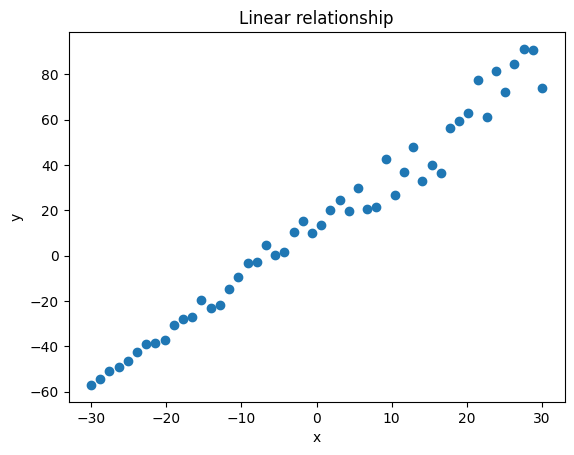

In [6]:
# Visualize the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear relationship')
plt.show()

In [7]:
# train test split
train_percent = 0.8

train_data_idx = int(len(x) * train_percent)

x_train = x[:train_data_idx]
x_test = x[train_data_idx:]

y_train = y[:train_data_idx]
y_test = y[train_data_idx:]

❗ Havasetoon bashe ke dar vaghe nabayd biain yek tike az data ro joda konin va oon ro be onvane `validation dataset` entekhab konin, balke bayad data haye random az kolle sample mojood tooye dataset entekhab konin va oonaro berizin tooye `validation dataset`

Code e zir dar vaghe doroste, ama inja mikhasim ke namayesh bedim az raveshe bala estefade kardim, kholase ke havasetoon bashe.😎
```
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
```

In [8]:
np.expand_dims(x_train, axis=-1).shape

(40, 1)

Mitoonim az `np.expand_dims(data, axis=[index])` estefade konim ta biaim tooye shape e data e morede nazaremoon adade 1 ro ezafe konim. Manzooram chie? 🤔

Seloole pain ro ejra kon ta motevajeh beshi.

In [ ]:
toy = np.array([[1, 2, 3], [4, 5, 6]])
toy1 = np.expand_dims(toy, axis=1)
toyend = np.expand_dims(toy, axis=-1)
print(f' Age axis ro 1 gharar bedim array mishe:\n{toy1}')
print(f'Shape esh mishe: {toy1.shape}')
print('------------------------')
print(f'Age axis ro -1 gharar bedim array mishe:\n{toyend}')
print(f'Shape esh mishe: {toyend.shape}')

## Sakhtane Neural Network

Sakhtane Neural Network 🧠 3 ghesmate asli dare:
1. Sakhte model (Create the model)
2. Compile kardane model (Compile the model)
3. Fit kardane data be model (Fit the model)

In [22]:
# Create the model
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,))
])

🤔 Chera inja `input_shape` emoon barabar ba `(1,)` hastesh?

Hamishe bayad be in nokte deghat konim, ke shayad vurudi hamoon chie? shayad aln kolle `x` shape esh `(50,)` bashe ama ma yek doone az `training set` emoon ro bayad dar nazar begirim. Tooye in mesal ma mikhaim az yek `x` estefade konim va yek `y` ro hads bezanim, pas `input_shape` e neural network e ma bayad barabar bashe ba `(1,)`

In [23]:
# Compile the model
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.1),
    loss = keras.losses.mse
)

In [24]:
# Fit the model
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=100,
                    verbose=0) # verbose 0 mizarim ke epoch ha va etelaatesh nayad baramoon.

## Check kardane performance e model

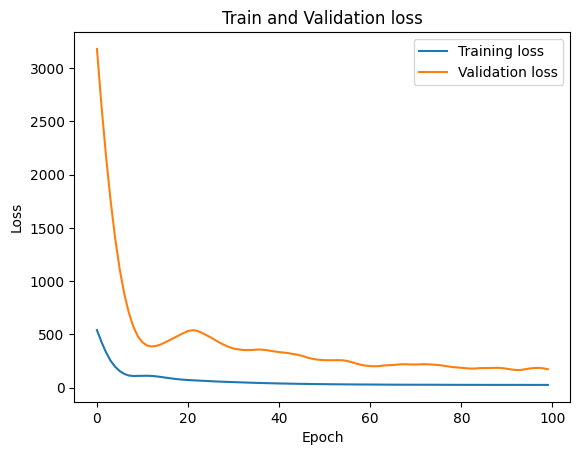

In [28]:
# Train va validation loss ro bekeshim
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

Chera `Validation loss` va `Training loss` ro baham rasm mikonim❓

Dalilesh ine ke be komake fasele nemoodare `validation` va `training` loss mitoonim bebinim age modelemoon dare `overfit` mishe yana. Avayele train kardan (mesle nemoodare bala) mibinim ke raftare dota loss ha mesle hame va hududan dar rastaye ham dge taghir mikonan, ama agar model ro ziad train konim, bade ye modat mibinim ke ba inke `training` loss dare kam mishe ama `validation` loss afzayesh peyda mikone, inja jayie ke migim model dare `overfit` mishe be training dataset va ma nemikhaim ke in etefagh biofte. Pas yademoon bashe age didim az yejai bebad `validation loss` hamash dare az `training loss` fasele migire oonja jaie ke bayad training ro ghat konim ta model emoon `generalized` bemoone be data haye jadid.

🤔 Agar biaim va epoch haye modele bala ro ziad konim, aya model emoon over fit mishe? chera mishe? chera nemishe?

In [31]:
# biaim prediction model ro rooye validation dataset bebininm
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 26ms/step


2/2 [==============================] - 0s 4ms/step


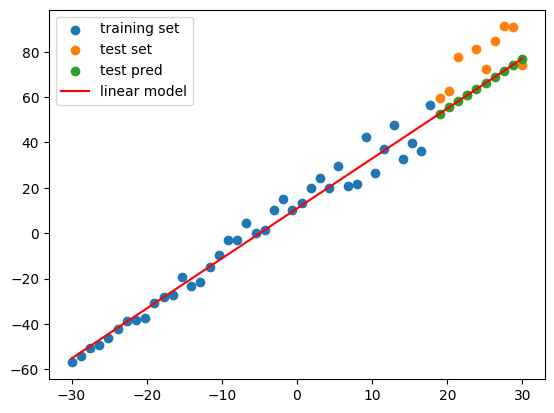

In [32]:
# Nemoodar rasm konim bebinim performance e model chejuri boode.
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.plot(x, model.predict(x), c='r')
plt.legend(['training set', 'test set', 'test pred', 'linear model'])
plt.show()

#Non-linear Regression

In [56]:
# Create a simple dataset
x = np.linspace(-15, 30, 50)

slope = 2
intercept = 3
noise = 10

y = 3 * x ** 2 + x * slope + intercept + np.arange(len(x)) * np.random.rand(len(x)) * noise

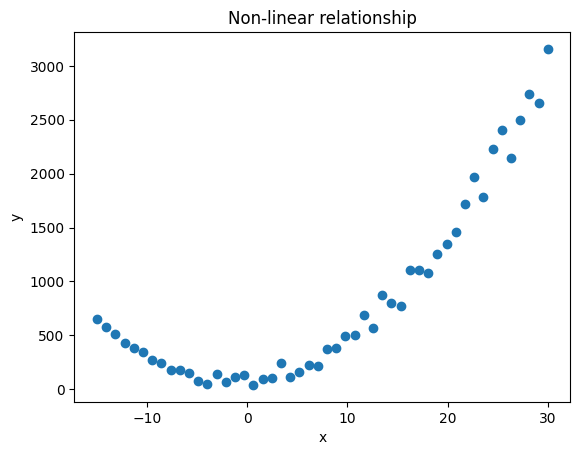

In [57]:
# Visualize the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear relationship')
plt.show()

##Sakhate Model e avval

In [58]:
# Create the model
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(1,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

Tedade laye ha ve neuron haro kamo ziad konin va bebinin che taghiri mikone tooye performance e model i ke train mikonin.

In [59]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(0.03),
    loss='mse'
)

In [60]:
# Fit the model
history = model.fit(x, y, epochs=20, verbose=0)

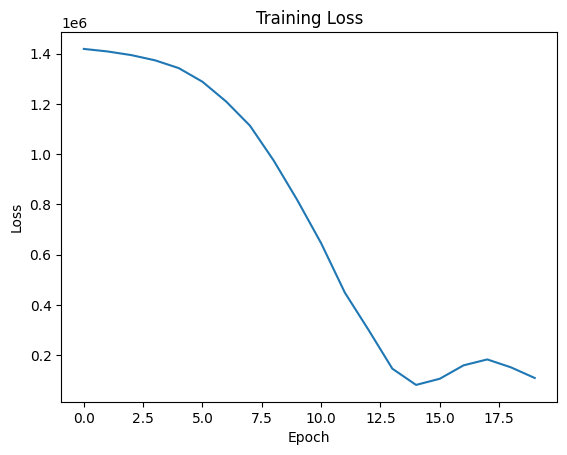

In [61]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [62]:
y_pred = model.predict(x)

2/2 [==============================] - 0s 5ms/step


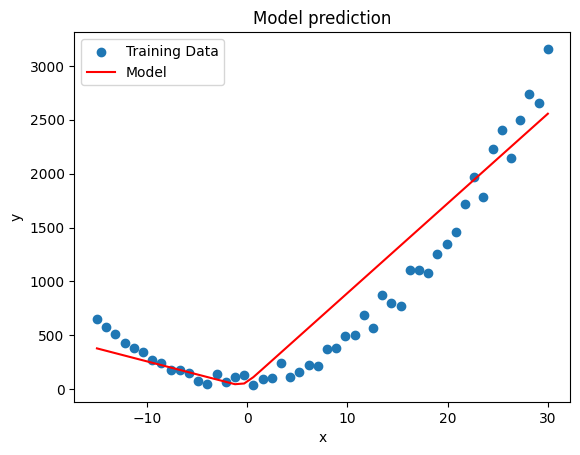

In [63]:
# Bebinim Neural Networkemoon chikar karde.
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model prediction')
plt.legend(['Training Data', 'Model'])
plt.show()

Yek chize kheyli mohem zamani ke mikhaim Neural Network hamoon ro train konim ine ke biaim va rooye data hamoon `Standardization` ya `Normalization` anjam bedim. Etefaghi ke miofte ine ke range e data hamoon hame mesle ham mishe, va in mozoo komak mikone be Neural Network ke sorate yadgirish afzayesh peyda kone. Pas yadetoon nare ke hatman yeki az dota ro rooye input data va output data etoon piade konin.

##Preprocess kardane data va tasiratesh

In [64]:
# Standardization
x = (x - x.mean()) / x.std()

In [65]:
y = (y - y.mean()) / y.std()

In [66]:
# Create the model
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(1,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

In [67]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(0.03),
    loss='mse'
)

In [68]:
# Fit the model
history = model.fit(x, y, epochs=20, verbose=0)

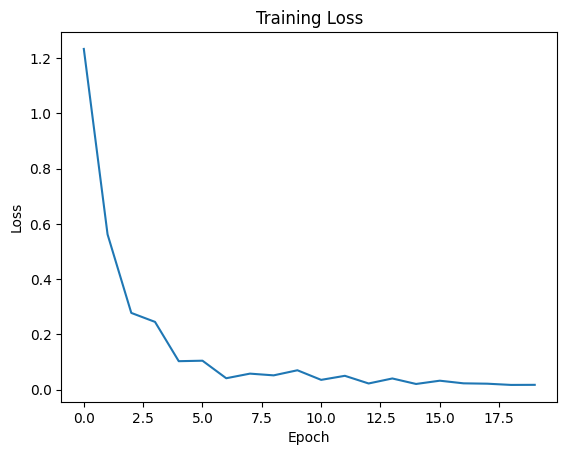

In [73]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [74]:
y_pred = model.predict(x)

2/2 [==============================] - 0s 5ms/step


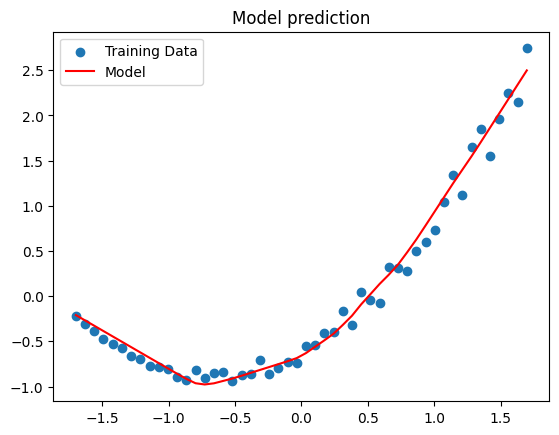

In [75]:
# Bebinim modeloom chikar karde
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')
plt.title('Model prediction')
plt.legend(['Training Data', 'Model'])
plt.show()

🙂 Hamoontor ke mibinin, faghat ba preprocess kardane data bedoone hich taghire dgei tooye model, cheghadr perofrmance e ma behtar shod va model emoon pish binish khyli daghigh tar shod.

Faghat yadetoon bashe ke agar meghdar haye vagheie x, y ro mikhain bayad meghdar haye standard shodeye oonharo be meghdare haye aslie avaliashoon bargardoonin. Fekr nakonam ziad kare sakhti bashe😀

Agar soali dasthim mitoonin behem payam bedin.😉